In [1]:
from qiskit import ClassicalRegister, QuantumCircuit, QuantumRegister
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import bitstring
from qiskit_aer import AerSimulator

from qiskit_aer.noise import (NoiseModel, QuantumError, ReadoutError,
    pauli_error, depolarizing_error, thermal_relaxation_error)

from qiskit.circuit.library import UnitaryGate

In [2]:
matrix_h = ([[2**(-0.5),2**(-0.5)],[2**(-0.5),-2**(-0.5)]])
h_ideal = UnitaryGate(matrix_h)

matrix_cx = ([[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]])
cx_ideal = UnitaryGate(matrix_cx)       #Erst Target, dann Control Qubit!!

matrix_x = ([[0,1],[1,0]])
x_ideal = UnitaryGate(matrix_x)

matrix_z = ([[1,0],[0,-1]])
z_ideal = UnitaryGate(matrix_z)

In [3]:
def code() -> QuantumCircuit:    #Returns the |0+> State
    qr = QuantumRegister(7, "q")
    cbit = ClassicalRegister(7,"c")
    qc = QuantumCircuit(qr,cbit)
    qc.h(0)
    qc.cx(0,1)
    qc.h(2)
    qc.cx(2,3)
    return qc

def X_L(qc: QuantumCircuit, q: list,n: int)-> QuantumCircuit:
    if n == 1:
        qc.x(q[0])
        qc.x(q[2])
    elif n == 2:
        qc.x(q[0])
        qc.x(q[1])

def Z_L(qc: QuantumCircuit, q: list, n: int)-> QuantumCircuit:
    if n == 1:
        qc.z(q[0])
        qc.z(q[1])
    elif n == 2:
        qc.z(q[0])
        qc.z(q[2])

def CNOT(control: int, q: list) -> QuantumCircuit:
    if control == 1:
        q[0], q[1] = q[1], q[0]
    elif control == 2:
        q[0], q[2] = q[2], q[0]

def H(qc: QuantumCircuit, q:list) -> QuantumCircuit:
    for i in range(4):
        qc.h(q[i])
    q[1], q[2] = q[2], q[1]

def CZ_L(qc: QuantumCircuit, q: list)-> QuantumCircuit:
    for i in range(4):
        qc.s(q[i])
    qc.z(q[1])
    qc.z(q[2])

def S_L(qc: QuantumCircuit, q: list, pos: int)-> QuantumCircuit:
    qc.reset(q[5])
    qc.reset(q[4])

    qc.h(q[5])
    qc.s(q[5])

    qc.cx(q[5],q[4])

    if pos == 1:
        qc.cx(q[0],q[4])
        qc.cx(q[1],q[4])
    elif pos == 2:
        qc.cx(q[0],q[4])
        qc.cx(q[2],q[4])

    qc.measure(q[4],0)

    if pos == 1:
        with qc.if_test((0,1)):
            qc.z(q[0])
            qc.z(q[1])
    elif pos == 2:
        with qc.if_test((0,1)):
            qc.z(q[0])
            qc.z(q[2])


    qc.h(q[5])
    qc.measure(q[5],0)

    if pos == 1:
        with qc.if_test((0,1)):
            qc.z(q[0])
            qc.z(q[1])
    elif pos == 2:
        with qc.if_test((0,1)):
            qc.z(q[0])
            qc.z(q[2])

def adj_S_L(qc: QuantumCircuit, q: list, pos: int)-> QuantumCircuit:
    qc.reset(q[5])
    qc.reset(q[4])

    qc.h(q[5])
    qc.sdg(q[5])

    qc.cx(q[5],q[4])

    if pos == 1:
        qc.cx(q[0],q[4])
        qc.cx(q[1],q[4])
    elif pos == 2:
        qc.cx(q[0],q[4])
        qc.cx(q[2],q[4])

    qc.measure(q[4],0)

    if pos == 1:
        with qc.if_test((0,1)):
            qc.z(q[0])
            qc.z(q[1])
    elif pos == 2:
        with qc.if_test((0,1)):
            qc.z(q[0])
            qc.z(q[2])


    qc.h(q[5])
    qc.measure(q[5],0)

    if pos == 1:
        with qc.if_test((0,1)):
            qc.z(q[0])
            qc.z(q[1])
    elif pos == 2:
        with qc.if_test((0,1)):
            qc.z(q[0])
            qc.z(q[2])

def T_L(qc: QuantumCircuit, q: list, pos: int)-> QuantumCircuit:
    qc.reset(q[6])
    qc.reset(q[5])
    qc.reset(q[4])

    qc.h(q[6])
    qc.t(q[6])

    qc.cx(q[6],q[4])

    if pos == 1:
        qc.cx(q[0],q[4])
        qc.cx(q[1],q[4])
    elif pos == 2:
        qc.cx(q[0],q[4])
        qc.cx(q[2],q[4])

    qc.measure(q[4],0)

    if pos == 1:
        with qc.if_test((0,1)):
            qc.reset(q[4])
            qc.h(q[5])
            qc.s(q[5])
            qc.cx(q[0],q[4])
            qc.cx(q[1],q[4])
            qc.cx(q[5],q[4])
            qc.measure(q[4],0)
            with qc.if_test((0,1)):
                qc.z(q[0])
                qc.z(q[1])
            qc.h(q[5])
            qc.measure(q[5],0)
            with qc.if_test((0,1)):
                qc.z(q[0])
                qc.z(q[1])

    elif pos == 2:
        with qc.if_test((0,1)):
            qc.reset(q[4])
            qc.h(q[5])
            qc.s(q[5])
            qc.cx(q[0],q[4])
            qc.cx(q[2],q[4])
            qc.cx(q[5],q[4])
            qc.measure(q[4],0)
            with qc.if_test((0,1)):
                qc.z(q[0])
                qc.z(q[2])
            qc.h(q[5])
            qc.measure(q[5],0)
            with qc.if_test((0,1)):
                qc.z(q[0])
                qc.z(q[2])

    qc.h(q[6])
    qc.measure(q[6],0)

    if pos == 1:
        with qc.if_test((0,1)):
            qc.z(q[0])
            qc.z(q[1])
    elif pos == 2:
        with qc.if_test((0,1)):
            qc.z(q[0])
            qc.z(q[2])

def adj_T_L(qc: QuantumCircuit, q: list, pos: int)-> QuantumCircuit:
    qc.reset(q[6])
    qc.reset(q[5])
    qc.reset(q[4])

    qc.h(q[6])
    qc.tdg(q[6])

    qc.cx(q[6],q[4])

    if pos == 1:
        qc.cx(q[0],q[4])
        qc.cx(q[1],q[4])
    elif pos == 2:
        qc.cx(q[0],q[4])
        qc.cx(q[2],q[4])

    qc.measure(q[4],0)

    if pos == 1:
        with qc.if_test((0,1)):
            qc.reset(q[4])
            qc.h(q[5])
            qc.sdg(q[5])
            qc.cx(q[0],q[4])
            qc.cx(q[1],q[4])
            qc.cx(q[5],q[4])
            qc.measure(q[4],0)
            with qc.if_test((0,1)):
                qc.z(q[0])
                qc.z(q[1])
            qc.h(q[5])
            qc.measure(q[5],0)
            with qc.if_test((0,1)):
                qc.z(q[0])
                qc.z(q[1])

    elif pos == 2:
        with qc.if_test((0,1)):
            qc.reset(q[4])
            qc.h(q[5])
            qc.sdg(q[5])
            qc.cx(q[0],q[4])
            qc.cx(q[2],q[4])
            qc.cx(q[5],q[4])
            qc.measure(q[4],0)
            with qc.if_test((0,1)):
                qc.z(q[0])
                qc.z(q[2])
            qc.h(q[5])
            qc.measure(q[5],0)
            with qc.if_test((0,1)):
                qc.z(q[0])
                qc.z(q[2])

    qc.h(q[6])
    qc.measure(q[6],0)

    if pos == 1:
        with qc.if_test((0,1)):
            qc.z(q[0])
            qc.z(q[1])
    elif pos == 2:
        with qc.if_test((0,1)):
            qc.z(q[0])
            qc.z(q[2])

def CS_L(qc: QuantumCircuit, q: list, control: int, target: int)-> QuantumCircuit:
    T_L(qc, q, control)
    T_L(qc, q, target)
    CNOT(control, q)
    adj_T_L(qc, q, target)
    CNOT(control, q)

def readout(qc: QuantumCircuit, q: list, pos: int,shots: int, err: float):
    qc.reset(q[4])
    if pos == 1:
        qc.cx(q[0],q[4])
        qc.cx(q[1],q[4])
    elif pos == 2:
        qc.cx(q[0],q[4])
        qc.cx(q[2],q[4])
    qc.measure(q[4],0)
    
    for i in range(4):
        qc.measure(q[i],6-i)

    sim = AerSimulator()
    if err == 0:
        job = sim.run(qc, shots=shots)
    else:
        p = err
        p_error = pauli_error([["X",p/2],["I",1-p],["Z",p/2]])
        p_error_2 = pauli_error([["XX",p/6],["XI",p/6],["IX",p/6],["II",1-p],["ZZ",p/6],["ZI",p/6],["IZ",p/6]])
        noise_model = NoiseModel()
        noise_model.add_all_qubit_quantum_error(p_error, ['x', "z", 'h'])  # Apply to single-qubit gates
        noise_model.add_all_qubit_quantum_error(p_error_2, ['cx'])  # Apply to 2-qubit gates
        job = sim.run(qc, noise_model=noise_model, shots=shots)

    result = job.result()
    counts = result.get_counts()

    return counts

def check(qc: QuantumCircuit, q: list):
    qc.reset(q[4])
    for i in range(4):
        qc.cx(q[i],q[4])
    qc.measure(q[4], 6)

In [4]:
q = [0,1,2,3,4,5,6]         # = q0, q1, q2, q3, a, s_m, t_m    in this order

qc = code()

X_L(qc, q, 1)

CS_L(qc, q, 1, 2)
CS_L(qc, q, 1, 2)

H(qc, q)

counts = readout(qc, q, 2, 1000, 0)

print(counts)

{'0011001': 231, '0110001': 267, '1001001': 240, '1100001': 262}


In [5]:
#iQPE first iteration
def iQPE_1(shots: int, err: float):
    q = [0,1,2,3,4,5,6]         # = q0, q1, q2, q3, a, s_m, t_m    in this order
    qc = code()

    X_L(qc, q, 1)

    CZ_L(qc, q)

    H(qc, q)

    counts = readout(qc, q, 2, shots, err)

    return counts

shots = 1000
counts = iQPE_1(shots, 0.1)

x = list(counts.keys())
y = list(counts.values())

all = 0

ehm = 0
for i in x:
    if int(i[6]) == 1:
        all += y[ehm]
    ehm += 1

all = all/shots

print("Succesrate without any postselection: ", all)

check = [(i.count("1",0,6)%2-1) for i in x]

check = [-i for i in check]

y_new = np.multiply(check, y)

all = 0

for i in range(len(x)):
    if int(x[i][6]) == 1 and check[i] == 1:
        all += y_new[i]

postselec = sum(y_new)

all = all/postselec

print("Succesrate with postselection: ", all)


Succesrate without any postselection:  0.708
Succesrate with postselection:  0.8551483420593369


In [6]:
#iQPE second iteration

q = [0,1,2,3,4,5,6]         # = q0, q1, q2, q3, a, s_m, t_m    in this order
qc = code()

def iQPE_2(shots: int, err: float):

    X_L(qc, q, 1)

    CS_L(qc, q, control = 2, target = 1)

    adj_S_L(qc, q, 2)

    H(qc, q)

    counts = readout(qc, q, 2, shots, err)

    return counts

shots = 1000

counts = iQPE_2(shots, 0.01)

x = list(counts.keys())
y = list(counts.values())

all = 0

ehm = 0
for i in x:
    if int(i[6]) == 0:
        all += y[ehm]
    ehm += 1

all = all/shots

print("Succesrate without any postselection: ", all)

check = [(i.count("1",0,6)%2-1) for i in x]

check = [-i for i in check]

y_new = np.multiply(check, y)

all = 0

for i in range(len(x)):
    if int(x[i][6]) == 0 and check[i] == 1:
        all += y_new[i]

postselec = sum(y_new)

all = all/postselec

print("Succesrate with postselection: ", all)

Succesrate without any postselection:  0.836
Succesrate with postselection:  0.8956422018348624


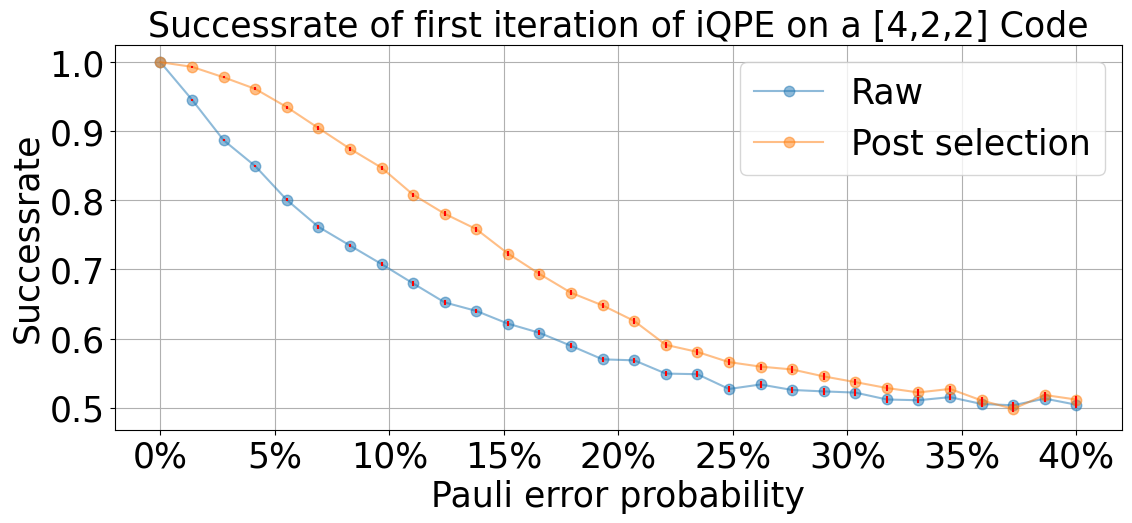

In [7]:
plot_x = np.linspace(0,0.4,30)
plot_y = []
plot_y_ps = []

shots = 10000

for i in range(len(plot_x)):
    q = [0,1,2,3,4,5,6]         # = q0, q1, q2, q3, a, s_m, t_m    in this order
    qc = code()
    counts = iQPE_1(shots, plot_x[i])

    x = list(counts.keys())
    y = list(counts.values())

    all = 0

    ehm = 0
    for i in x:
        if int(i[6]) == 1:
            all += y[ehm]
        ehm += 1

    all = all/shots

    plot_y.append(all)

    check = [(i.count("1",0,6)%2-1) for i in x]

    check = [-i for i in check]

    y_new = np.multiply(check, y)

    all = 0

    for i in range(len(x)):
        if int(x[i][6]) == 1 and check[i] == 1:
            all += y_new[i]

    postselec = sum(y_new)

    all = all/postselec

    plot_y_ps.append(all)

err = [np.sqrt((i-i**2)/shots) for i in plot_x]

fig, ax = plt.subplots(figsize=(13,5))
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 0))

ax.plot(plot_x,plot_y, label="Raw", marker = ".",markersize = 15, alpha = 0.5)
ax.plot(plot_x,plot_y_ps, label="Post selection", marker = ".",markersize = 15, alpha = 0.5)
ax = plt.errorbar(plot_x, plot_y, yerr=err, ecolor="red", linestyle="")
ax = plt.errorbar(plot_x, plot_y_ps, yerr=err, ecolor="red", linestyle="")
plt.title("Successrate of first iteration of iQPE on a [4,2,2] Code", fontsize=25)
plt.xlabel("Pauli error probability",fontsize=25)
plt.ylabel("Successrate",fontsize=25)
plt.xticks(fontsize=25) 
plt.yticks(fontsize=25)
plt.grid()
plt.legend(fontsize=25)
plt.show()

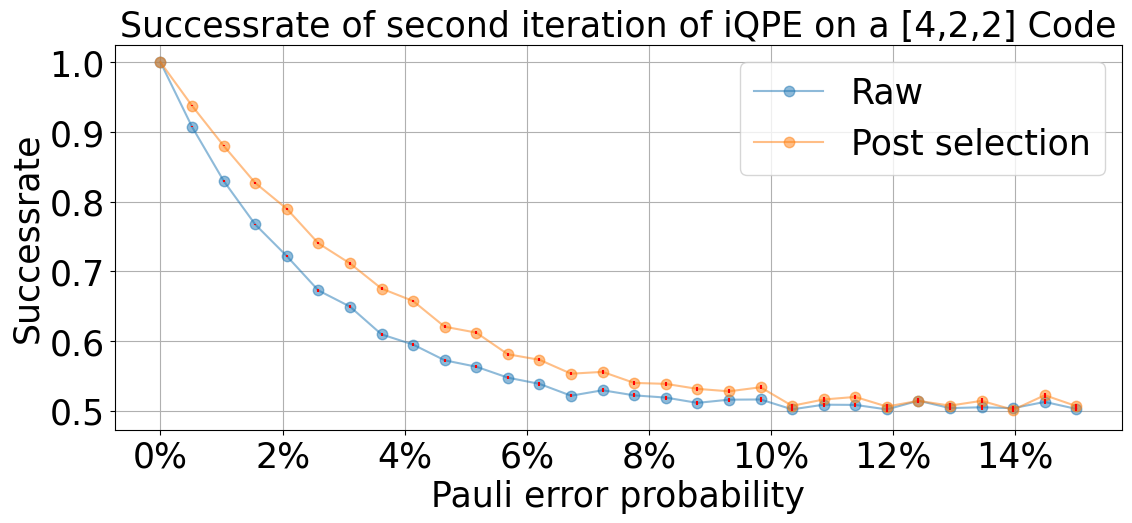

In [8]:
q = [0,1,2,3,4,5,6]         # = q0, q1, q2, q3, a, s_m, t_m    in this order
qc = code()

plot_x = np.linspace(0,0.15,30)
plot_y = []
plot_y_ps = []

shots = 10000

for i in range(len(plot_x)):
    q = [0,1,2,3,4,5,6]         # = q0, q1, q2, q3, a, s_m, t_m    in this order
    qc = code()

    counts = iQPE_2(shots, plot_x[i])

    x = list(counts.keys())
    y = list(counts.values())

    all = 0

    ehm = 0
    for i in x:
        if int(i[6]) == 0:
            all += y[ehm]
        ehm += 1

    all = all/shots

    plot_y.append(all)

    check = [(i.count("1",0,6)%2-1) for i in x]

    check = [-i for i in check]

    y_new = np.multiply(check, y)

    all = 0

    for i in range(len(x)):
        if int(x[i][6]) == 0 and check[i] == 1:
            all += y_new[i]

    postselec = sum(y_new)

    all = all/postselec

    plot_y_ps.append(all)

err = [np.sqrt((i-i**2)/shots) for i in plot_x]

fig, ax = plt.subplots(figsize=(13,5))
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 0))

ax.plot(plot_x,plot_y, label="Raw", marker = ".",markersize = 15, alpha = 0.5)
ax.plot(plot_x,plot_y_ps, label="Post selection", marker = ".",markersize = 15, alpha = 0.5)
ax = plt.errorbar(plot_x, plot_y, yerr=err, ecolor="red", linestyle="")
ax = plt.errorbar(plot_x, plot_y_ps, yerr=err, ecolor="red", linestyle="")
plt.title("Successrate of second iteration of iQPE on a [4,2,2] Code", fontsize=25)
plt.xlabel("Pauli error probability",fontsize=25)
plt.ylabel("Successrate",fontsize=25)
plt.xticks(fontsize=25) 
plt.yticks(fontsize=25)
plt.grid()
plt.legend(fontsize=25)
plt.show()